<a href="https://colab.research.google.com/github/leodavidfan/AI_Books/blob/main/EarlyStopExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Generate random training data
X_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000, 1)

# Generate random validation data
X_val = np.random.rand(200, 10)
y_val = np.random.rand(200, 1)

In [3]:
# Define a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Define early stopping criteria
early_stop = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    min_delta=0.001,      # Minimum change to be considered an improvement
    patience=5,           # Stop after 5 epochs with no improvement
    verbose=1,
    restore_best_weights=True  # Restore the best weights at stopping
)

In [5]:
# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Maximum number of epochs
    batch_size=32,
    callbacks=[early_stop],  # Apply early stopping
    verbose=1
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3138 - val_loss: 0.1016
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0936 - val_loss: 0.0908
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0883 - val_loss: 0.0918
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0889 - val_loss: 0.0901
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0860 - val_loss: 0.0906
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0846 - val_loss: 0.0921
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0860 - val_loss: 0.0910
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.


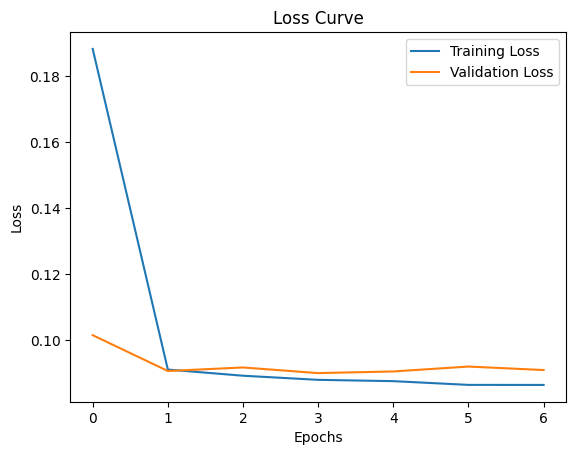

In [6]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()